In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

c:\Users\kim_h\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# pip install ydata-profiling
from ydata_profiling import ProfileReport

## EDA

In [3]:
path = "data/Battery_RUL.csv"

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()

Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0          1.0             2595.30             1151.488500   
1          2.0             7408.64             1172.512500   
2          3.0             7393.76             1112.992000   
3          4.0             7385.50             1080.320667   
4          6.0            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s)   RUL  
0                    6755.01           10777.82  1112  
1                    6762.02           10500.35  1111  
2                    6762.02           10420.38  1110  
3                    6762.02           10322.81  1109  
4                   53213.54           56699.65  1107

In [6]:
data.shape

(15064, 9)

In [7]:
def get_metadata(dataframe):
    '''
    중간 중간 마다 데이터셋 확인 용 함수 
    '''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 100)
    print("STATISTICAL INFORMATION")
    display(dataframe.describe(include='all'))
    print("=" * 100)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 100)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 100)
    print("NULL Values Check")
    print(dataframe.isnull().sum())
    print("=" * 100)

In [8]:
get_metadata(data)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB
None
STATISTICAL INFORMATION


Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
count  15064.000000        15064.000000            15064.000000   
mean     556.155005         4581.273960             1239.784672   
std      322.378480        33144.012077            15039.589269   
min        1.000000            8.690000          -397645.908000   
25%      271.000000         1169.310000              319.600000   
50%      560.000000         1557.250000              439.239471   
75%      833.000000         1908.000000              600.000000   
max     1134.000000       958320.370000           406703.768000   

       Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
count               15064.000000             15064.000000       15064.000000   
mean                    3.908176                 3.577904        3768.336171   
std                     0.091003                 0.123695        9129.552477   
min                     3.043000                 3.022000        -113.584000   
25%                     3.846000                 3.488000        1828.884179   
50%                     3.906000                 3.574000        2930.203500   
75%                     3.972000                 3.663000        4088.326500   
max                     4.363000                 4.379000      245101.117000   

       Time constant current (s)  Charging time (s)           RUL  
count               15064.000000       15064.000000  15064.000000  
mean                 5461.266970       10066.496204    554.194172  
std                 25155.845202       26415.354121    322.434514  
min                     5.980000           5.980000      0.000000  
25%                  2564.310000        7841.922500    277.000000  
50%                  3824.260000        8320.415000    551.000000  
75%                  5012.350000        8763.282500    839.000000  
max                880728.100000      880728.100000   1133.000000

Dataframe Shape
 (15064, 9)
Number of Duplicate Rows
 0
NULL Values Check
Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64


from ydata_profiling import ProfileReport 를 통해 데이터 분석 시각화 하기 

In [9]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
sns.pairplot(data)

### 타겟 값인 RUL 분포 확인하기

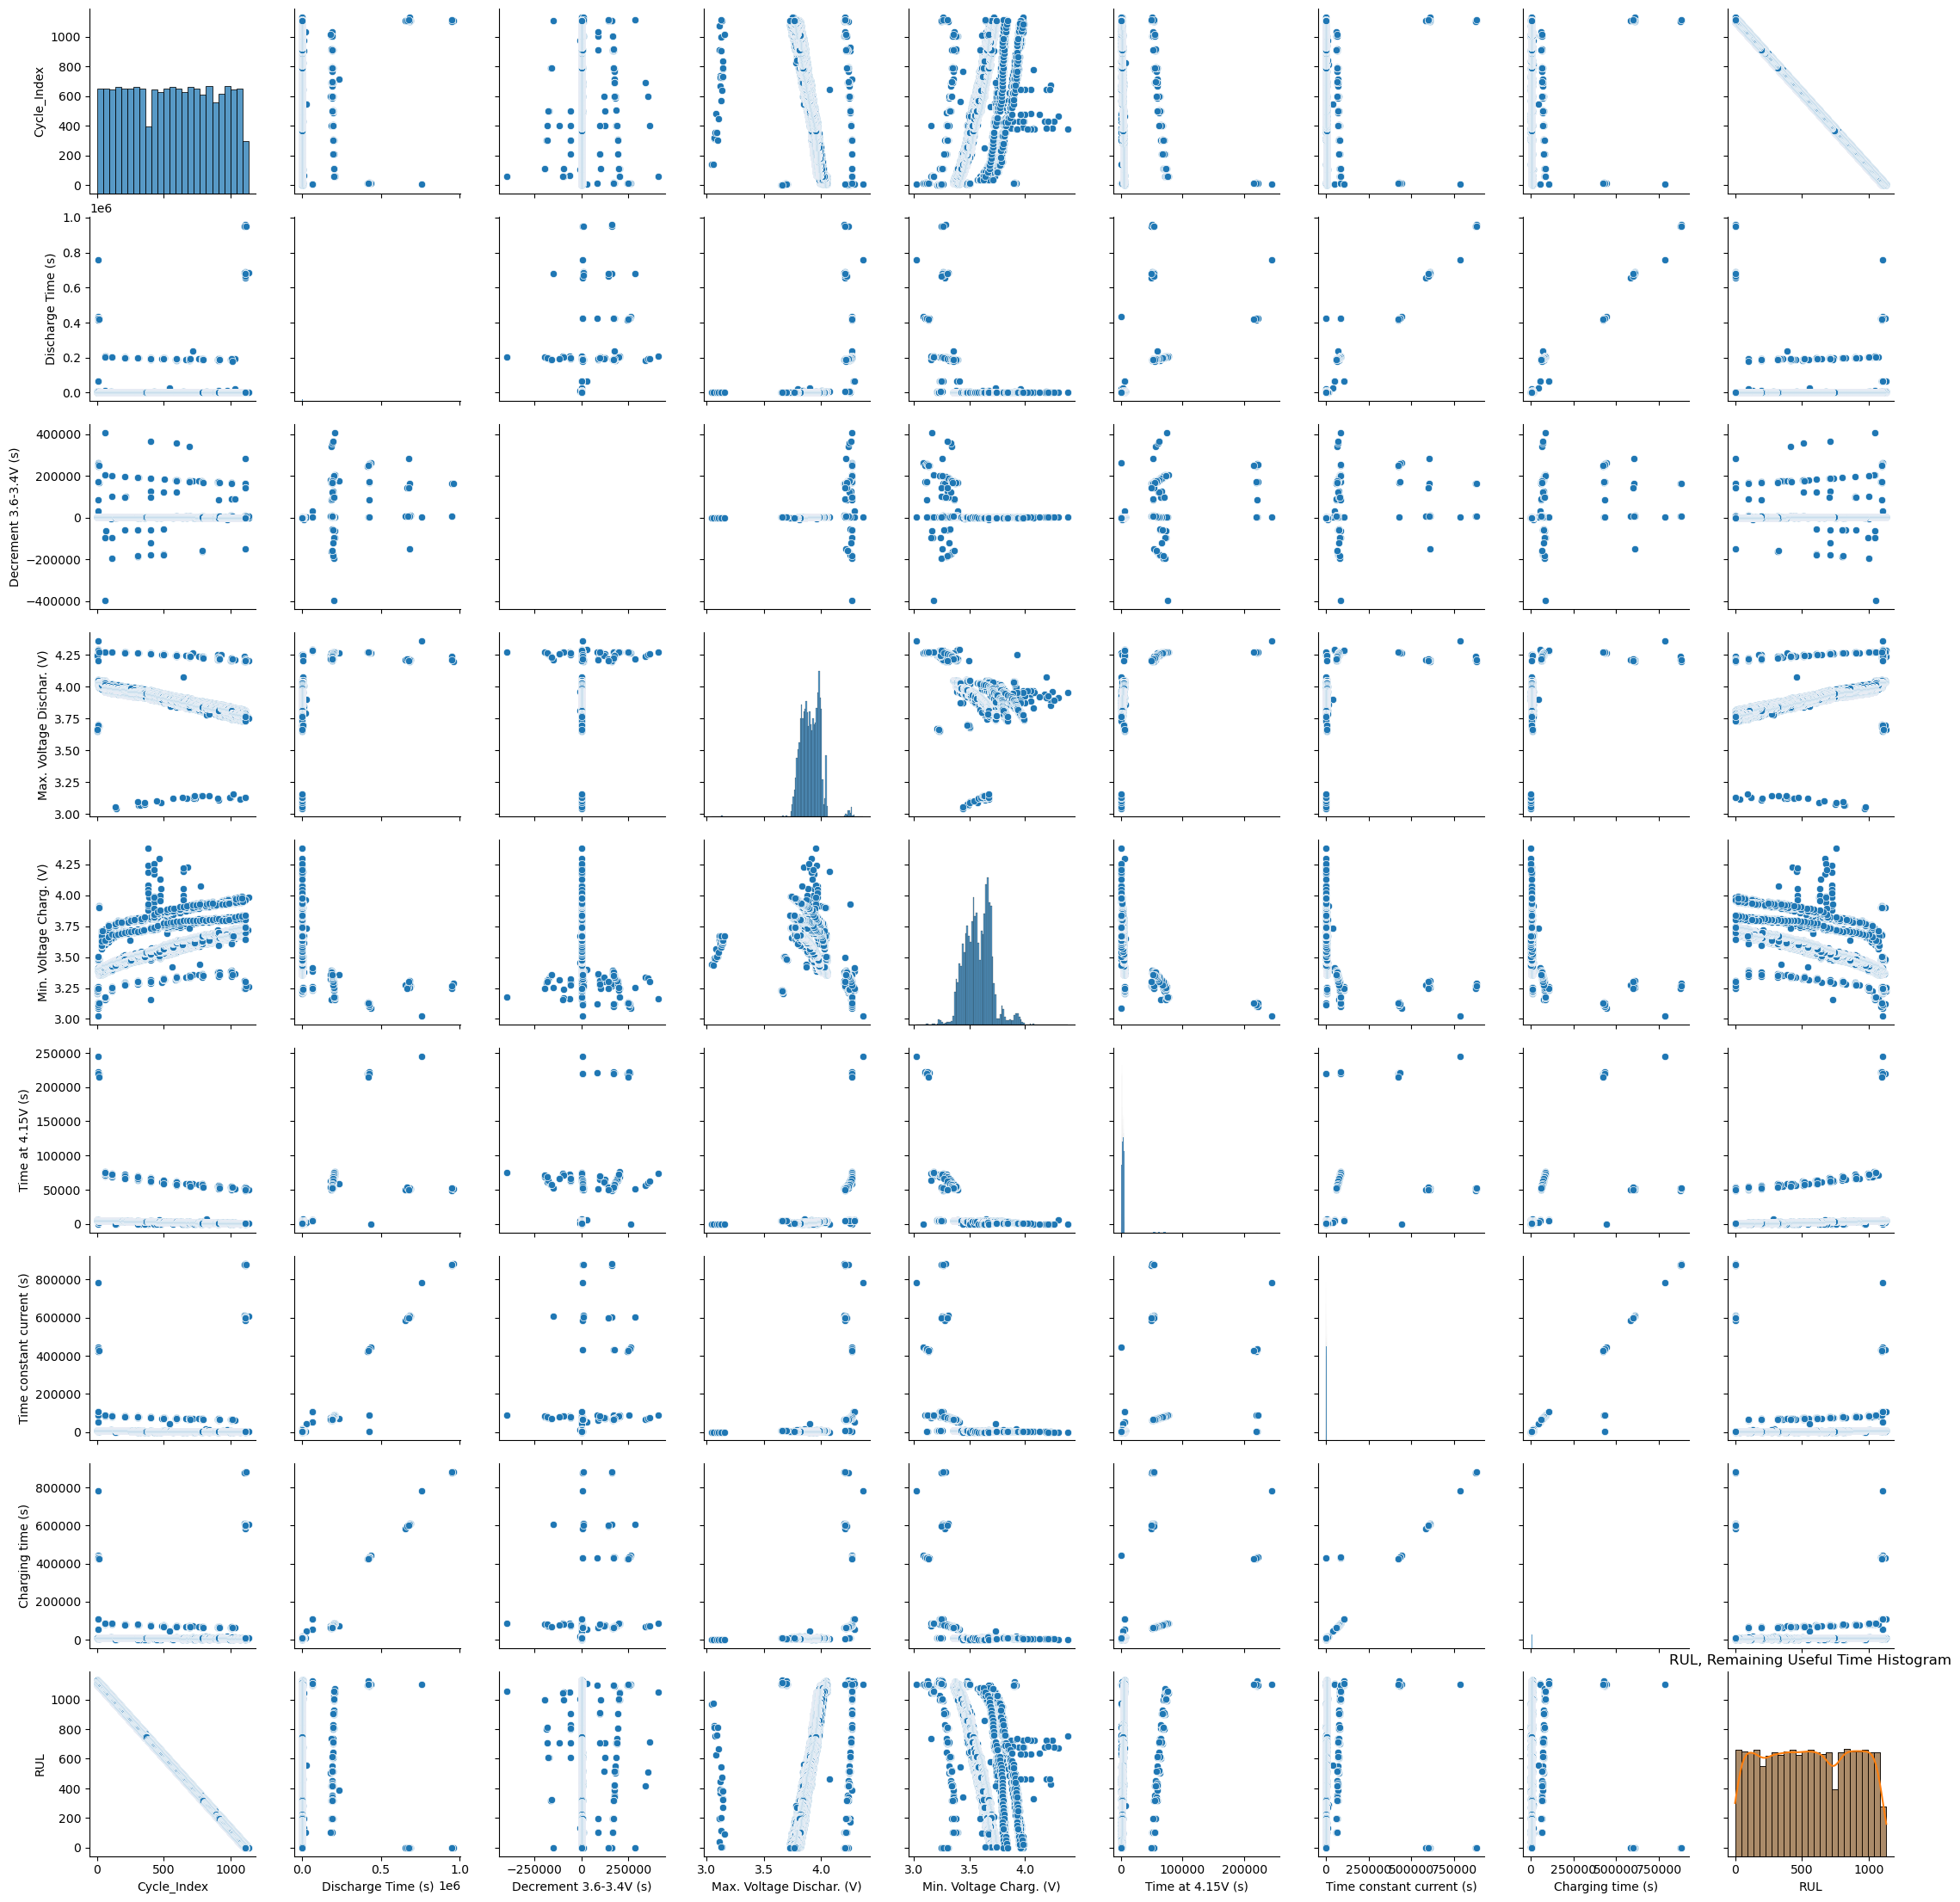

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter의 셀 내부에 바로 표시하도록 설정
%matplotlib inline          
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(data['RUL'], kde=True)
plt.show()

### 상관관계도 히트맵 확인하기

<Axes: >

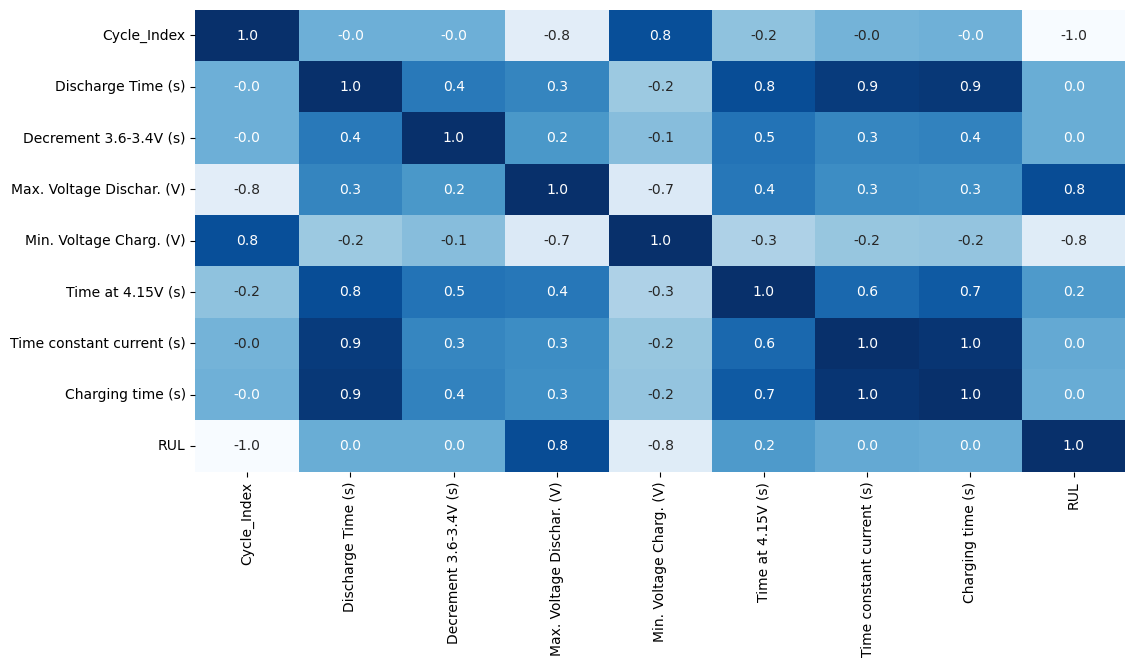

In [12]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [13]:
# 다음 컬럼들은 RUL에 관계가 없기 때문에 제거한다.
data=data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)'],axis=1)

In [14]:
data.head()

Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)   RUL
0                      3.670                    3.211           5460.001  1112
1                      4.246                    3.220           5508.992  1111
2                      4.249                    3.224           5508.993  1110
3                      4.250                    3.225           5502.016  1109
4                      4.290                    3.398           5480.992  1107

### Data Visualization

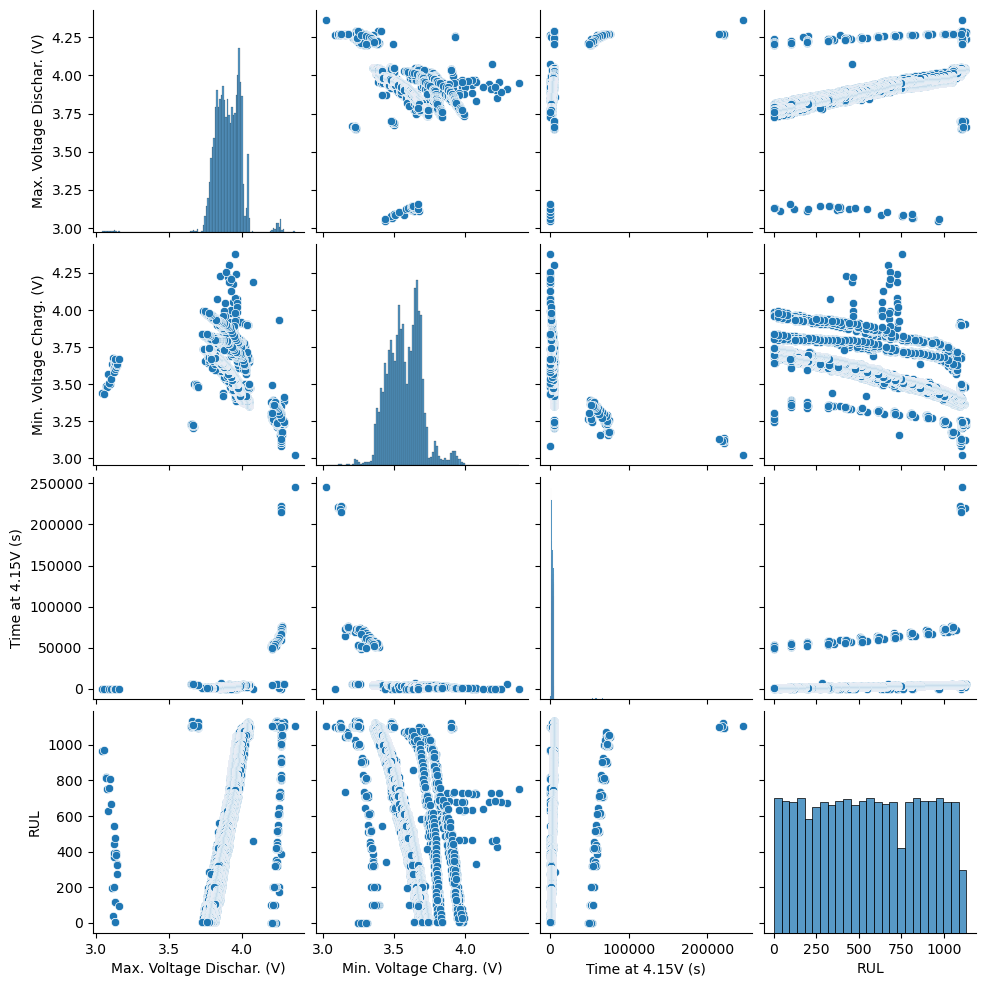

In [15]:
sns.pairplot(data)

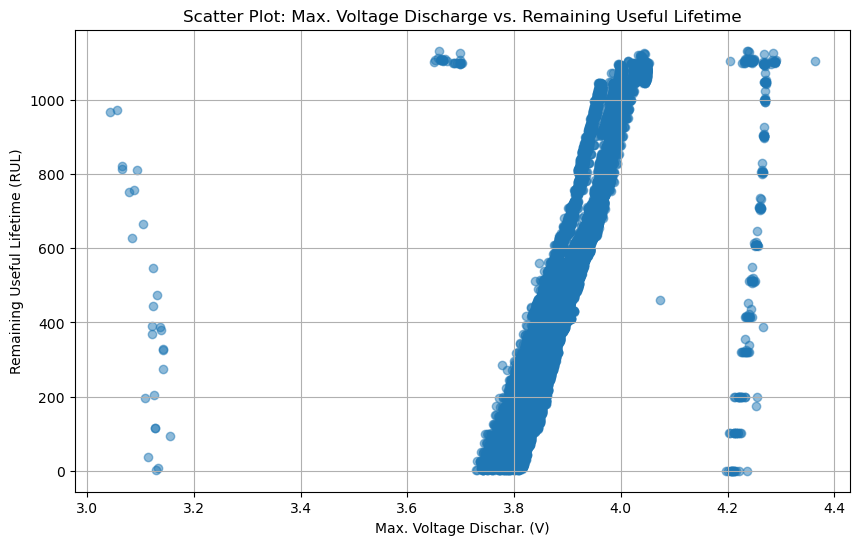

In [16]:
# 최대 전압 방전과 RUL간의 관계 시각화

plt.figure(figsize=(10, 6))
plt.scatter(data['Max. Voltage Dischar. (V)'], data['RUL'], alpha=0.5)
plt.title('Scatter Plot: Max. Voltage Discharge vs. Remaining Useful Lifetime')
plt.xlabel('Max. Voltage Dischar. (V)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)
plt.show()

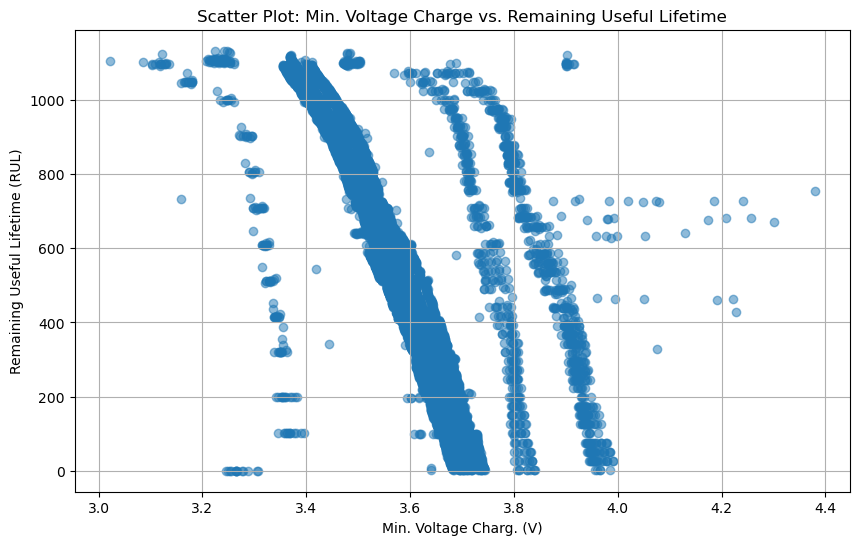

In [17]:
# 최소 전압 방전과 RUL간의 관계 시각화

plt.figure(figsize=(10, 6))
plt.scatter(data['Min. Voltage Charg. (V)'], data['RUL'], alpha=0.5)
plt.title('Scatter Plot: Min. Voltage Charge vs. Remaining Useful Lifetime')
plt.xlabel('Min. Voltage Charg. (V)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)
plt.show()

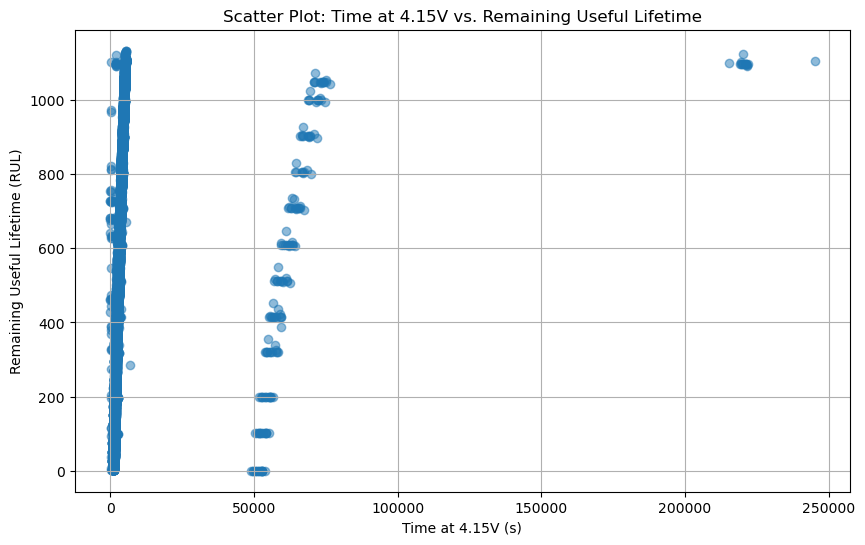

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Time at 4.15V (s)'], data['RUL'], alpha=0.5)
plt.title('Scatter Plot: Time at 4.15V vs. Remaining Useful Lifetime')
plt.xlabel('Time at 4.15V (s)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)
plt.show()

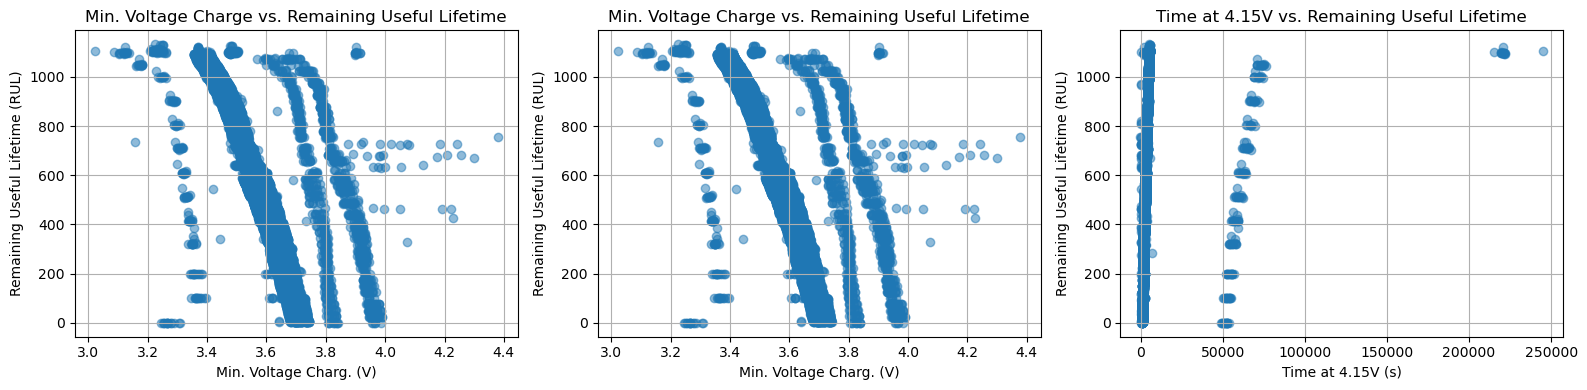

In [19]:
plt.figure(figsize=(16, 4))

plt.subplot(1,3,1)
plt.scatter(data['Min. Voltage Charg. (V)'], data['RUL'], alpha=0.5)
plt.title('Min. Voltage Charge vs. Remaining Useful Lifetime')
plt.xlabel('Min. Voltage Charg. (V)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)

plt.subplot(1,3,2)
plt.scatter(data['Min. Voltage Charg. (V)'], data['RUL'], alpha=0.5)
plt.title('Min. Voltage Charge vs. Remaining Useful Lifetime')
plt.xlabel('Min. Voltage Charg. (V)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)

plt.subplot(1,3,3)
plt.scatter(data['Time at 4.15V (s)'], data['RUL'], alpha=0.5)
plt.title('Time at 4.15V vs. Remaining Useful Lifetime')
plt.xlabel('Time at 4.15V (s)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)

plt.tight_layout()

plt.show()

## Modeling and Predections

In [20]:
X = data.drop(['RUL'], axis=1)
y = data['RUL']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2023, shuffle =True)

In [22]:
class Pipeline:
    def __init__(self, scalar):
        self.scalar = scalar
    
    def fit(self, X, y):
        X = self.scalar.fit_transform(X)
        return X, y
    
    def transform(self, X, y):
        X = self.scalar.transform(X)
        return X, y

In [23]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
pipeline = Pipeline(robust)

In [24]:
X_train_s, y_train_s = pipeline.fit(X_train, y_train)
X_test_s, y_test_s = pipeline.transform(X_test, y_test)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    "LinearRegression": {"model":LinearRegression()},
    "KNeighborsRegressor": {"model":KNeighborsRegressor(n_neighbors=3)},
    "DecisionTreeRegressor": {"model":DecisionTreeRegressor()},
    "RandomForestRegressor": {"model":RandomForestRegressor()},
    "SVR": {"model":SVR(kernel='linear', C=1.0)},
    "XGBRegressor": {"model":XGBRegressor()},
    "LGBMRegressor": {"model":LGBMRegressor(verbose=-1)}
}

In [26]:
from time import perf_counter

# Train모델 학습
for name, model in models.items():
    model = model['model']
    start = perf_counter()
    
    history = model.fit(X_train_s, y_train_s)
    
    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    
    y_train_pred = model.predict(X_train_s)
    y_test_pred = model.predict(X_test_s)
    
    train_score = round(model.score(X_train_s, y_train_s),4)
    test_score = round(model.score(X_test_s, y_test_s),4)
    
    models[name]['train_score'] = train_score
    models[name]['test_score'] = test_score
    
    print(f"{name:20} trained in {duration} sec, train_score: {train_score}. val_mae: {test_score}")

LinearRegression     trained in 0.0 sec, train_score: 0.7238. val_mae: 0.7564
KNeighborsRegressor  trained in 0.01 sec, train_score: 0.9959. val_mae: 0.9913
DecisionTreeRegressor trained in 0.07 sec, train_score: 1.0. val_mae: 0.9852
RandomForestRegressor trained in 5.1 sec, train_score: 0.9986. val_mae: 0.9914
SVR                  trained in 3.11 sec, train_score: 0.6607. val_mae: 0.7272
XGBRegressor         trained in 0.11 sec, train_score: 0.995. val_mae: 0.9886
LGBMRegressor        trained in 0.18 sec, train_score: 0.988. val_mae: 0.9855


In [27]:
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['test_score'], 
                          models[name]['perf']])
    
df_results = pd.DataFrame(models_result, 
                          columns = ['model','test_score','Training time (sec)'])
df_results.sort_values(by='test_score', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

model  test_score  Training time (sec)
0  RandomForestRegressor      0.9914                 5.10
1    KNeighborsRegressor      0.9913                 0.01
2           XGBRegressor      0.9886                 0.11
3          LGBMRegressor      0.9855                 0.18
4  DecisionTreeRegressor      0.9852                 0.07
5       LinearRegression      0.7564                 0.00
6                    SVR      0.7272                 3.11

In [28]:
def check_performance_for_model(df_results):
    plt.figure(figsize = (15,5))
    sns.barplot(x = 'model', y = 'test_score', data = df_results)
    plt.title('ACC (%) on the Test set', fontsize = 15)
    plt.ylim(0,1.2)
    plt.xticks(rotation=90)
    plt.show()

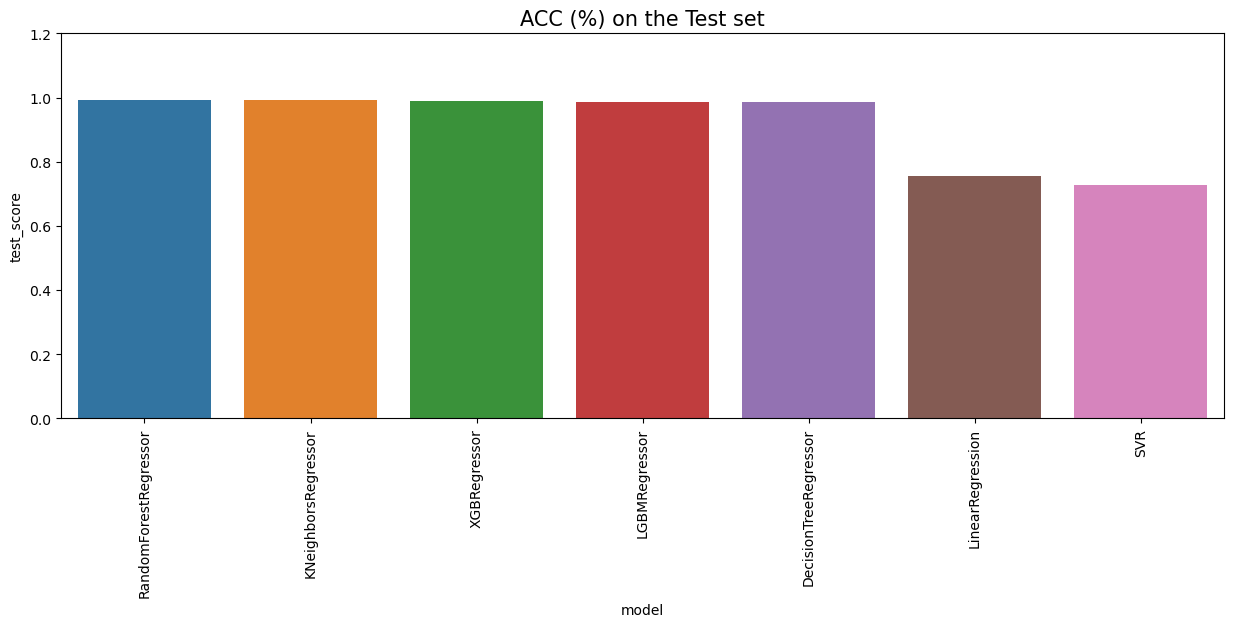

In [29]:

    
check_performance_for_model(df_results)

In [30]:
def RUL_metric(y_valid, y_pred, threshold=10):

    error = y_valid.values - y_pred.reshape(-1)
    per = np.where(error<=threshold, 1, 0)
    
    return sum(per) / len(per)

In [36]:

model = RandomForestRegressor()

model.fit(X_train_s, y_train_s)

y_test_pred = model.predict(X_test_s)
test_score = round(model.score(X_test_s, y_test_s),4)


print('acc:', test_score)
print(f'RMSE : {mean_squared_error(y_test_s, y_test_pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_test_s, y_test_pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_test_s, y_test_pred)}')
print(f'R2 : {r2_score(y_test_s, y_test_pred)}')

print(f'RUL_metric : {RUL_metric(y_test_s, y_test_pred, threshold=100)}')

acc: 0.9915
RMSE : 29.60527811992624
MAE  : 15.270302848331609
MAPE : 1793468878156.5781
R2 : 0.9915265305813719
RUL_metric : 0.9871279163314561


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pipeline = Pipeline(scaler)

X_train_s, y_train_s = pipeline.fit(X_train, y_train)
X_test_s, y_test_s = pipeline.transform(X_test, y_test)

models = {
    "LinearRegression": {"model":LinearRegression()},
    "KNeighborsRegressor": {"model":KNeighborsRegressor(n_neighbors=3)},
    "DecisionTreeRegressor": {"model":DecisionTreeRegressor()},
    "RandomForestRegressor": {"model":RandomForestRegressor()},
    "SVR": {"model":SVR(kernel='linear', C=1.0)},
    "XGBRegressor": {"model":XGBRegressor()},
    "LGBMRegressor": {"model":LGBMRegressor(verbose=-1)}
}

from time import perf_counter

# Train모델 학습
for name, model in models.items():
    model = model['model']
    start = perf_counter()
    
    history = model.fit(X_train_s, y_train_s)
    
    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    
    y_train_pred = model.predict(X_train_s)
    y_test_pred = model.predict(X_test_s)
    
    train_score = round(model.score(X_train_s, y_train_s),4)
    test_score = round(model.score(X_test_s, y_test_s),4)
    
    models[name]['train_score'] = train_score
    models[name]['test_score'] = test_score
    
    print(f"{name:20} trained in {duration} sec, train_score: {train_score}. val_mae: {test_score}")
    
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['test_score'], 
                          models[name]['perf']])
    
df_results = pd.DataFrame(models_result, 
                          columns = ['model','test_score','Training time (sec)'])
df_results.sort_values(by='test_score', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

LinearRegression     trained in 0.0 sec, train_score: 0.7238. val_mae: 0.7564
KNeighborsRegressor  trained in 0.01 sec, train_score: 0.994. val_mae: 0.9869
DecisionTreeRegressor trained in 0.07 sec, train_score: 1.0. val_mae: 0.985
RandomForestRegressor trained in 4.6 sec, train_score: 0.9985. val_mae: 0.9915
SVR                  trained in 3.38 sec, train_score: 0.3561. val_mae: 0.3631
XGBRegressor         trained in 0.09 sec, train_score: 0.995. val_mae: 0.9886
LGBMRegressor        trained in 0.05 sec, train_score: 0.9882. val_mae: 0.9857


model  test_score  Training time (sec)
0  RandomForestRegressor      0.9915                 4.60
1           XGBRegressor      0.9886                 0.09
2    KNeighborsRegressor      0.9869                 0.01
3          LGBMRegressor      0.9857                 0.05
4  DecisionTreeRegressor      0.9850                 0.07
5       LinearRegression      0.7564                 0.00
6                    SVR      0.3631                 3.38

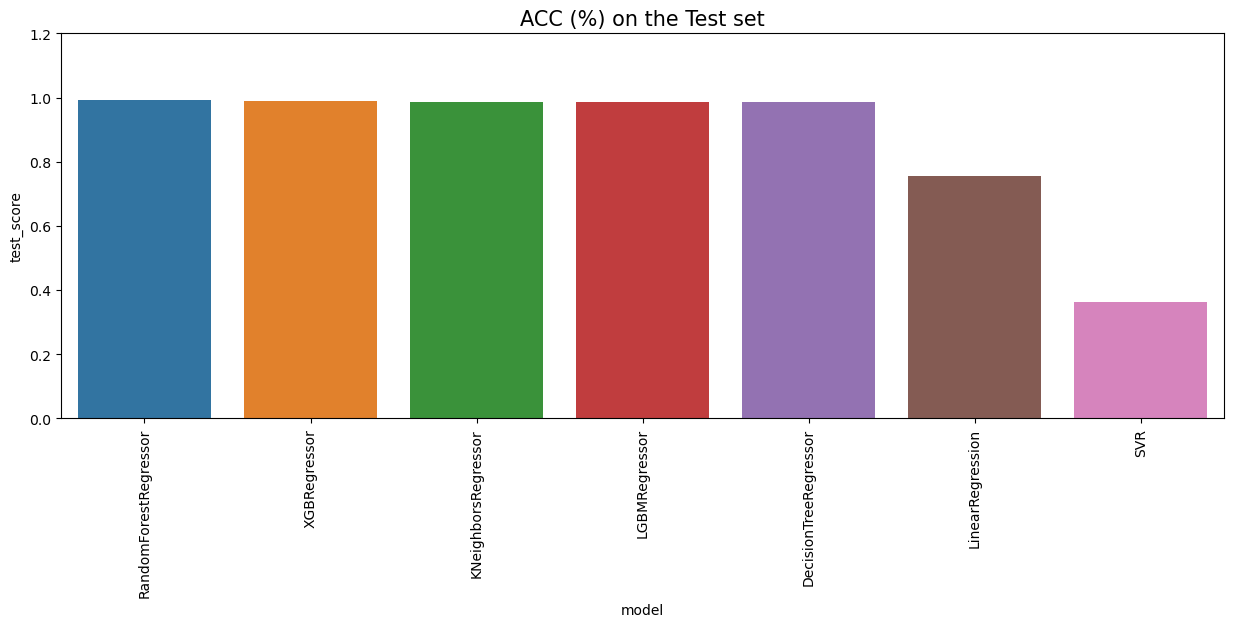

In [32]:
check_performance_for_model(df_results)

In [34]:

model = RandomForestRegressor()

model.fit(X_train_s, y_train_s)

y_test_pred = model.predict(X_test_s)
test_score = round(model.score(X_test_s, y_test_s),4)


print('acc:', test_score)
print(f'RMSE : {mean_squared_error(y_test_s, y_test_pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_test_s, y_test_pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_test_s, y_test_pred)}')
print(f'R2 : {r2_score(y_test_s, y_test_pred)}')

acc: 0.9915
MAE: 15.143576843817442
MAPE: 0.18032121019381173


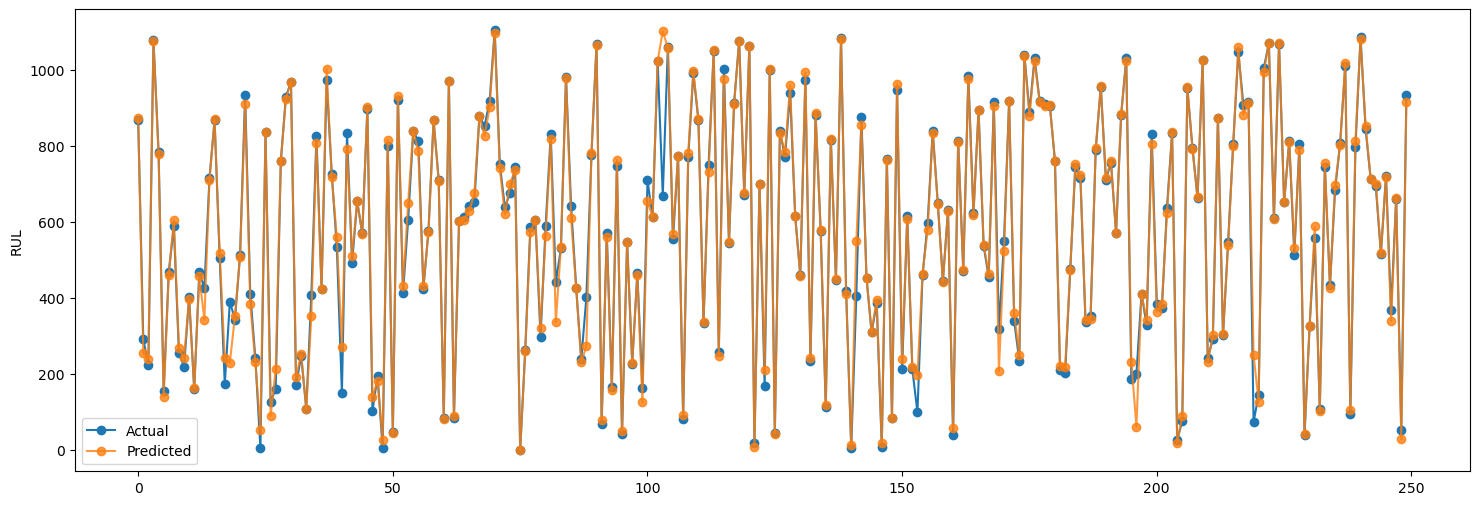

In [35]:
def eval_graph(y_valid, y_pred, cnt):
    plt.figure(figsize=(18,6))
    plt.plot(y_valid.values[:cnt], label='Actual',  marker = 'o')
    plt.plot(y_pred[:cnt], label='Predicted', alpha = 0.8,  marker = 'o')
    plt.legend()
    plt.ylabel('RUL')
    plt.show()

eval_graph(y_test_s, y_test_pred, 250)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pipeline = Pipeline(scaler)

X_train_s, y_train_s = pipeline.fit(X_train, y_train)
X_test_s, y_test_s = pipeline.transform(X_test, y_test)


models = {
    "LinearRegression": {"model":LinearRegression()},
    "KNeighborsRegressor": {"model":KNeighborsRegressor(n_neighbors=3)},
    "DecisionTreeRegressor": {"model":DecisionTreeRegressor()},
    "RandomForestRegressor": {"model":RandomForestRegressor()},
    "SVR": {"model":SVR(kernel='linear', C=1.0)},
    "XGBRegressor": {"model":XGBRegressor()},
    "LGBMRegressor": {"model":LGBMRegressor(verbose=-1)}
}

from time import perf_counter

# Train모델 학습
for name, model in models.items():
    model = model['model']
    start = perf_counter()
    
    history = model.fit(X_train_s, y_train_s)
    
    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    
    y_train_pred = model.predict(X_train_s)
    y_test_pred = model.predict(X_test_s)
    
    train_score = round(model.score(X_train_s, y_train_s),4)
    test_score = round(model.score(X_test_s, y_test_s),4)
    
    models[name]['train_score'] = train_score
    models[name]['test_score'] = test_score
    
    print(f"{name:20} trained in {duration} sec, train_score: {train_score}. val_mae: {test_score}")
    

    
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['test_score'], 
                          models[name]['perf']])
    
df_results = pd.DataFrame(models_result, 
                          columns = ['model','test_score','Training time (sec)'])
df_results.sort_values(by='test_score', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

LinearRegression     trained in 0.0 sec, train_score: 0.7238. val_mae: 0.7564
KNeighborsRegressor  trained in 0.01 sec, train_score: 0.9947. val_mae: 0.9885
DecisionTreeRegressor trained in 0.06 sec, train_score: 1.0. val_mae: 0.9852
RandomForestRegressor trained in 5.09 sec, train_score: 0.9986. val_mae: 0.9915
SVR                  trained in 3.26 sec, train_score: 0.6344. val_mae: 0.7219
XGBRegressor         trained in 0.09 sec, train_score: 0.995. val_mae: 0.9886
LGBMRegressor        trained in 0.05 sec, train_score: 0.9879. val_mae: 0.9855


model  test_score  Training time (sec)
0  RandomForestRegressor      0.9915                 5.09
1           XGBRegressor      0.9886                 0.09
2    KNeighborsRegressor      0.9885                 0.01
3          LGBMRegressor      0.9855                 0.05
4  DecisionTreeRegressor      0.9852                 0.06
5       LinearRegression      0.7564                 0.00
6                    SVR      0.7219                 3.26

스케일러에 따라 몇몇 모델은 성능 변화가 있음을 알 수 있다. 

In [30]:

model = RandomForestRegressor()

model.fit(X_train_s, y_train_s)

y_test_pred = model.predict(X_test_s)
test_score = round(model.score(X_test_s, y_test_s),4)


print('acc:', test_score)
print(f'RMSE : {mean_squared_error(y_test_s, y_test_pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_test_s, y_test_pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_test_s, y_test_pred)}')
print(f'R2 : {r2_score(y_test_s, y_test_pred)}')

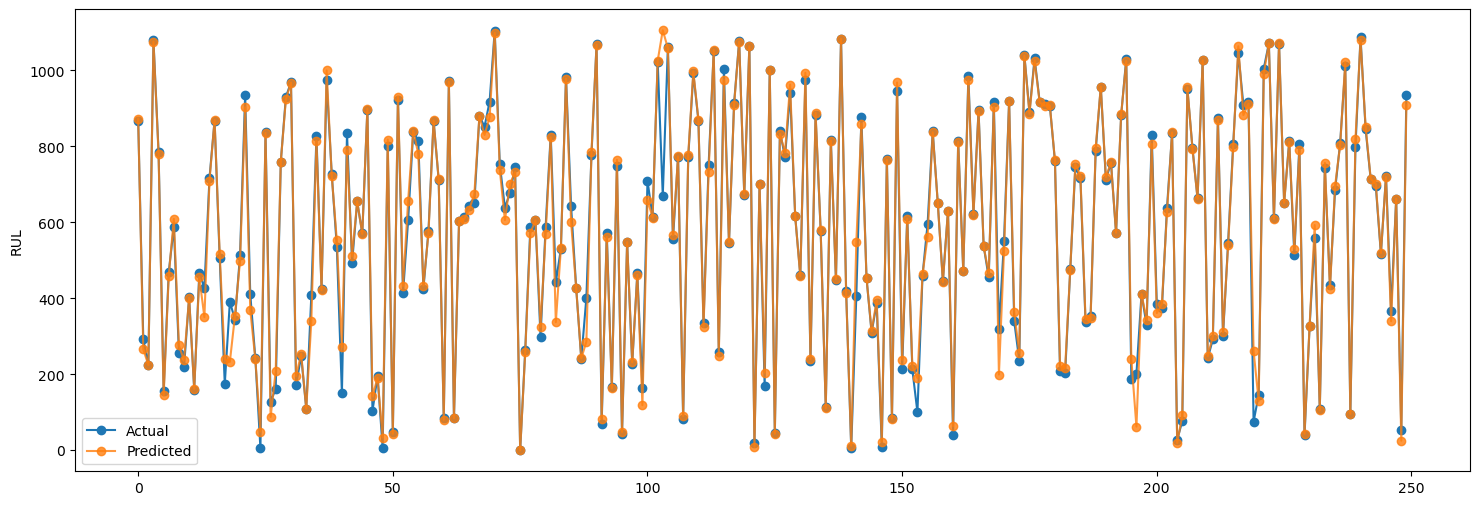

In [32]:

eval_graph(y_test_s, y_test_pred, 250)